In [1]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
%matplotlib inline

Using TensorFlow backend.


In [2]:
model = load_model('lenet.h5')

In [3]:
def returndigit(path):
    img =cv2.imread(path,0)
    invereted_img = 255-img
    invereted_img = invereted_img.astype('float32')
    invereted_img /= 255
    imgheight, imgwidth = invereted_img.shape
    old_i = 0
    finalnumber = []
    for i in range(0,imgwidth-1):
        count = 0
        for j in range(0,imgheight):
            if invereted_img[j][i] == 0:
                count +=1
            if count == imgheight:
                croppedimg = invereted_img[:,old_i:i+1]
                croppedwidth = croppedimg.shape[1]
                old_i = i
                if croppedwidth <= 28 and croppedwidth >= 5:
                    croppedimg = np.concatenate((croppedimg, np.zeros((28, (28-croppedwidth)),np.uint8)),axis=1)
                    cv2.imwrite('/media/windows-share/divided/'+str(old_i)+'.png',croppedimg)
                    croppedimg = croppedimg.reshape(1,*croppedimg.shape,1)
                    pred = model.predict(croppedimg).tolist()[0]
                    finalnumber.append(pred.index(max(pred)))
    return finalnumber



In [10]:
# path = '/media/windows-share/Combined/number_4.png'
path = '/media/windows-share/5.png'
Number =returndigit(path)
Number

[]

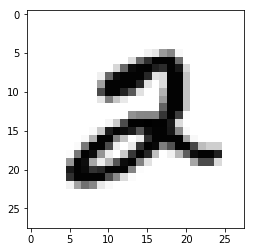

In [11]:
plt.imshow(255-cv2.imread(path))

In [6]:
imgp =cv2.imread('/media/windows-share/114.png')
imgp = cv2.cvtColor(imgp, cv2.COLOR_BGR2GRAY)
imgp = imgp.reshape(1,*imgp.shape,1)
impg = imgp/255
imgp.shape
model.predict(imgp).tolist()[0].index(1.0)

0

In [ ]:

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(invereted_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [8]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
cv2.imshow('image',x_train[0])
cv2.waitKey(0)
cv2.destroyAllWindows()